# Analisis de Textos

        and  document     first        is       one    second       the  \
0  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   
1  0.000000  0.687624  0.000000  0.281089  0.000000  0.538648  0.281089   
2  0.511849  0.000000  0.000000  0.267104  0.511849  0.000000  0.267104   
3  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   

      third      this  
0  0.000000  0.384085  
1  0.000000  0.281089  
2  0.511849  0.267104  
3  0.000000  0.384085  


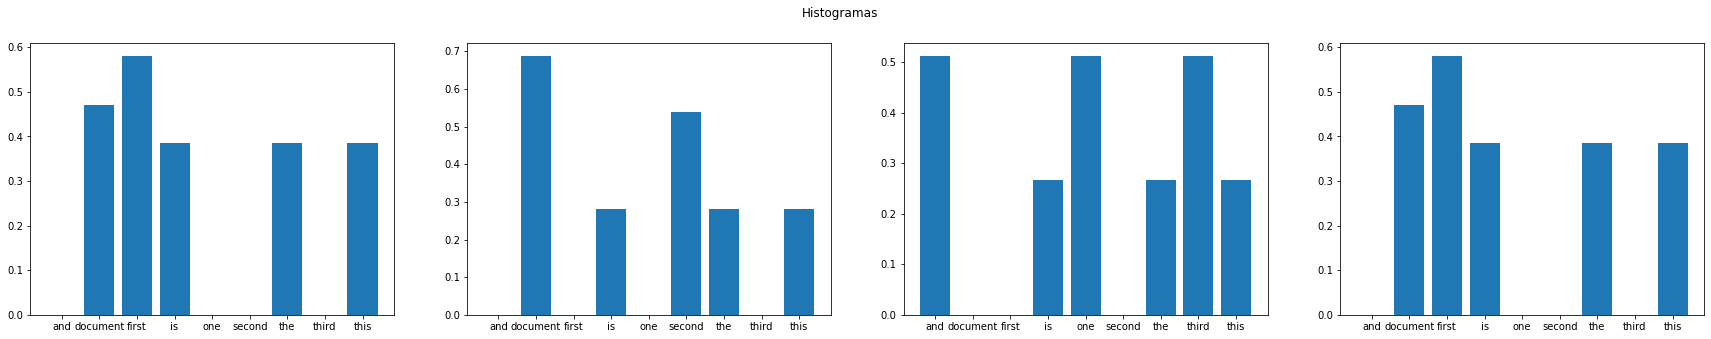

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document.'
        ]
vector = TfidfVectorizer()
x = vector.fit_transform(corpus)
#print(vector.get_feature_names())
#print(x.shape)
feature_names = vector.get_feature_names()
dense = x.todense()
den = np.array(dense)
names = np.array(feature_names)
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
print(df)
plt.figure(1,figsize=(30,5))
plt.subplot(141)
plt.bar(names, den[0])
plt.subplot(142)
plt.bar(names, den[1])
plt.subplot(143)
plt.bar(names, den[2])
plt.subplot(144)
plt.bar(names, den[3])
plt.suptitle("Histogramas")
plt.show()

In [2]:
import sklearn.datasets
archs = sklearn.datasets.fetch_20newsgroups(subset='all')
print(archs.filenames.shape)
print(archs.target_names)

#Entrenamiento y prueba
entrena = sklearn.datasets.fetch_20newsgroups(subset='train')
print('Archivos de entrenamiento: ', len(entrena.filenames))
prueba = sklearn.datasets.fetch_20newsgroups(subset='test')
print('Archivos de prueba: ', len(prueba.filenames))

#Seleccion de grupos de interes
#subgrupo = ['comp.graphics','comp.os.ms-windows.misc',
#            'comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
#            'comp.windows.x','sci.space']
#entrena = sklearn.datasets.fetch_20newsgroups(subset='train', categories=subgrupo)
#print('Archivos de entrenamiento: ', len(entrena.filenames))
#prueba = sklearn.datasets.fetch_20newsgroups(subset='test', categories=subgrupo)
#print('Archivos de prueba: ', len(prueba.filenames))

import nltk.stem
englishStemmer = nltk.stem.SnowballStemmer('english')
from sklearn.feature_extraction.text import TfidfVectorizer

class StemmedTfidfVectorizer(TfidfVectorizer):
  def build_analyzer(self):
    analyzer = super(TfidfVectorizer, self).build_analyzer()
    return lambda doc: (englishStemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                   stop_words='english', decode_error='ignore')
vectorized = vectorizer.fit_transform(entrena.data)
print(vectorized.shape)

#Aplicacion del clustering
from sklearn.cluster import KMeans
numClusters = 50
modeloT = KMeans(n_clusters=numClusters, init='random', n_init=1,
                 verbose=1, random_state=3)
modeloT.fit(vectorized)
print("Numero de etiquetas: ", len(modeloT.labels_))
print("Etiquetas: ", modeloT.labels_)
print("Forma de los centros: ", modeloT.cluster_centers_.shape,
      "\nCentros: \n", modeloT.cluster_centers_)
aux = 10000
for i in range(0,50):
  indices = [j for j in range(len(modeloT.labels_)) if modeloT.labels_[j]==i]
  print("Numero de documentos del cluster ",i,": ", len(indices),"\nDocumentos:\n",indices)
  if len(indices) <= aux:
    aux = len(indices)
    menor = i

print("\nEl cluster con el menos numero de archivos es el ",menor," con ",aux," documentos")

indices=[j for j in range(len(modeloT.labels_)) if modeloT.labels_[j]==menor]
print("Numero de documentos del cluster ",menor,": ", len(indices),"\nDocumentos:\n",indices)

#Contenido del documento 307
print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
print(entrena.data[indices[0]])

#Contenido del documento 985
print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
print(entrena.data[indices[2]])

#Contenido del documento 2095
print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
print(entrena.data[indices[4]])

#Contenido del documento 3138
print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
print(entrena.data[indices[6]])

(18846,)
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Archivos de entrenamiento:  11314
Archivos de prueba:  7532
(11314, 11771)
Initialization complete
Iteration 0, inertia 20149.34828018117
Iteration 1, inertia 10705.166055267064
Iteration 2, inertia 10585.185935594449
Iteration 3, inertia 10519.589418894815
Iteration 4, inertia 10482.669727074688
Iteration 5, inertia 10459.952976717155
Iteration 6, inertia 10448.856275627175
Iteration 7, inertia 10443.50109565939
Iteration 8, inertia 10440.288712482512
Iteration 9, inertia 10437.964049691767
Iteration 10, inertia 10436.475721919114
Iteration 11, inertia 10435.330173406386
Iteration 12, iner